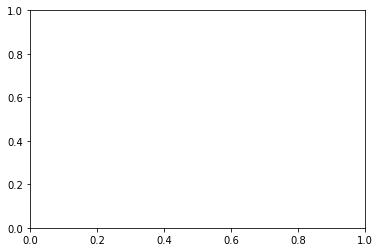

In [1]:
import nd_rust as nd_r
import nd_python as nd_p 
import numpy as np
import json

In [2]:
datas = ['CoMix_p1', 'CoMix_p2', 'polymod_df']
data_names = ['comix1', 'comix2', 'poly']
models = ['nbinom', 'dpln']
# models = ['sbm']
n = 100_000
buckets = np.array([5,12,18,30,40,50,60,70])
partitions = [0.058*n, 0.145*n, 0.212*n, 0.364*n, 0.497*n, 0.623*n, 0.759*n, 0.866*n, n]
# for i, data in enumerate(datas):
#     for model in models:
#         print(data, model)
#         egos, contact_matrix, params = nd_p.fit_to_data(input_file_path=f'input_data/{data}.csv', save_fig=False, buckets=buckets, dist_type=model)
#         # np.savetxt(f'input_data/egos/egos_{data_names[i]}_{model}.csv', egos, delimiter=',')
#         np.savetxt(f'input_data/parameters/params_{data_names[i]}_{model}.csv', params, delimiter=',')
#     np.savetxt(f'input_data/contact_matrices/contact_matrix_{data_names[i]}.csv', contact_matrix, delimiter=',')
#     # print(egos)
#     with open(f'input_data/egos/egos_{data_names[i]}.json', 'w') as file:
#         json.dump([{'age': a['age'], 'contacts': list(a['contacts']), 'degree': a['degree']} for a in egos], file)


In [3]:
# run code to check fit to data
data = data_names[2]
contact_matrix = np.genfromtxt(f'input_data/contact_matrices/contact_matrix_{data}.csv', delimiter=',')
sims = nd_p.simulate(partitions=partitions, contact_matrix=contact_matrix, network_params=[], tau=0.0106, n=n, dist_type='sbm',inv_gamma=5,prop_infec=1/n)

In [4]:
print(sims.keys())

dict_keys(['infections', 'final sizes', 'peak time', 'secondary cases by gen', 'degrees by gen', 'tau'])


In [3]:
n, iters = 100, 1
data_names = ['comix1']
models = ['sbm']
for data in data_names:
    for model in models: 
        # print(f'{data}: {model}')
        contact_matrix = np.genfromtxt(f'input_data/contact_matrices/contact_matrix_{data}.csv', delimiter=',')
        # params = np.genfromtxt(f'input_data/parameters/params_{data}_{model}.csv', delimiter=',')
        # print(params)
        # with open(f'input_data/egos/egos_{data}.json') as f:
        #     egos = json.load(f)
        nd_p.test_r0(partitions=partitions, contact_matrix=contact_matrix, iters=1, n=n, prop_infec=2e-2, r0=3, dist_type=model)